<div class="alert alert-block alert-info" style="text-align: center;">
<a href="https://colab.research.google.com/drive/12_Z4zQy-23HEyL4a373mx0p3tpX7eUi-#scrollTo=0vP9EENLd7zX"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</div>

# 🧪 Experiment 1: Warmup 🔥

Hello, all, and welcome to your first hands-on experiment in the course! 🥳 If you're new to Co-Lab: welcome! Check out [this quick tutorial](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow) to get situated.


For this initial exercise, we'll warm up our coding skills and have a short introduction to some fundamental machine learning mechanics. For folks who are more advanced, we encourage you to leverage your background and skillsets to remix what we've started for you here! 


As a reminder, please share your results with your learning team on Slack! At the end of each of the three sections, download or screenshot the images you've generated, and share them for feedback with your coursemates. 

Before we get started with the experiment, here are some **optional** readings that provide some additional context for the tools and techniques you'll explore:
- Machine learning (ML) intro http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 
- AI and creativity: https://towardsdatascience.com/supercreativity-b4114ebd0357 
- Generative models: https://openai.com/blog/generative-models/ 
- Neural network activations: https://distill.pub/2019/activation-atlas/ 


**Now, let's get to it!** In this experiment, we'll see three cool tricks with neural networks that show off their generative power:
- Style Transfer 🖼️
- Deep Dream 💭
- Neural Doodle ✏️

These are "old" tricks, but they can still teach us a whole lot about how neural networks work, and what they can be used for. Some key concepts to look out for are: **Loss function, Gradient (descent), Activation, Layer**.

While the base code provides some examples how these tricks work, **you are encouraged to tweak parameters and see what results you get!**
Hack around and change input images (we'll also guide you about where and how to do this, along the way); and remember to capture your creations! We can't wait to see what you come up with. 

Remember: All this code is free for you (and everyone) to use and share!

In [ ]:
# There's some boilerplate code here below, run it (shift+Enter over each cell, or hit the 'play' button) ... Expand and take a peek if you'd like! We've provided additional context amongst the code.

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from __future__ import absolute_import, division, print_function

import functools
import os
import time

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import clear_output

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.6.0
TF-Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  True


 To speed up the trainning process, please make sure that you are using **GPU** in the Google Colab:




**To do this**. . .Go to menu : Runtime -> Change runtime type -> Hardware Accelerator -> GPU





In [ ]:
print("GPU available: ", tf.test.is_gpu_available())

GPU available:  True


You should expect "GPU available:  True" in the previous output:

In [ ]:
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
    """Loads and preprocesses images."""
    # Cache image file locally.
    image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
    # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
    img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...] / 255.
    if img.shape[-1] == 4:
        img = img[..., :3] / tf.expand_dims(img[..., 3], -1) # pre multiply alpha
        
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

def show_n(images, titles=('',), w=8, colorbar=False):
    n = len(images)
    plt.figure(figsize=(w * n, w))
    for i in range(n):
        plt.subplot(1, n, 1 + i)
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i] if len(titles) > i else '')
        if colorbar:
            plt.colorbar()
    plt.show()

## Style Transfer 🖼️

**Style transfer** is a neat implementation that uses [deep convolutional networks](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) to tranfer artistic style from one image to another. 

Here's a reading that looks at this process a bit deeper: https://blog.paperspace.com/art-style-transfer-neural-networks/

Also, if you're looking for some inspiration, check out: http://genekogan.com/works/style-transfer/

Let's start by loading some images from the net:





In [ ]:
content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg'
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg' 
output_image_size = 512 

# The content image size can be arbitrary.
# Note that you can load any images from the internet you like! Tinker with adding your own images, and seeing what results.
# Also, see what happens with the final product when you switch the content image and the style image! 
content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)  # Recommended to keep it at 256.

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)

2695168/2684586 [==============================] - 0s 0us/step


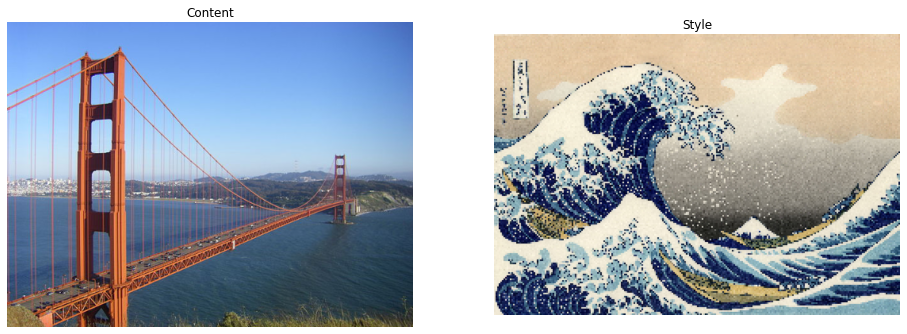

In [ ]:
show_n([content_image, style_image], ['Content', 'Style'])

The goal is to apply the style of "Style Image" to "Content Image".

Tensorflow Hub is a collection of models pre-trained and ready to use.
We can find a style transfer model there too: https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1

In [ ]:
# Load image stylization module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

Using it is very straightforward:

In [ ]:
# Stylize image.
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

# Run it again with the stylized images as input to the next transformation 
# content_image = stylized_image_1
# outputs = hub_module(stylized_image_1, style_image)
# stylized_image_2 = outputs[0]

# Run it again with the stylized images as input to the next transformation 
# content_image = stylized_image_2
# outputs = hub_module(content_image, style_image)
# stylized_image_3 = outputs[0]

And the reults are cool! Let's take a look at what we get: 

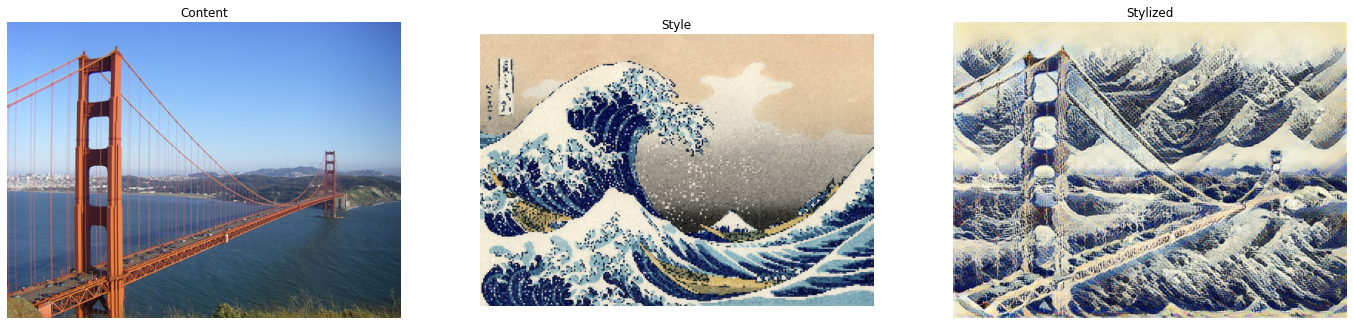

In [ ]:
show_n([content_image, style_image, stylized_image], ['Content', 'Style', 'Stylized'])
# show_n([content_image_original, style_image, stylized_image_1, stylized_image_2, stylized_image_3], ['Content', 'Style', 'Stylized 1', 'Stylized 2', 'Stylized 3'])

What's happening, here? Well, we iteratively change the "Content Image" to follow the "Style Image" on "low visual layers." The deep convolutional neural network is divided into many layers (sometimes dozens and hundreds). Each layer successively learns more complex visual constructs. If we try to match just the lower layers - only the "painting style" will transfer.

Have a look at the list layers of the deep model below. You will see many of them belong to "**[InceptionV3](https://cloud.google.com/tpu/docs/inception-v3-advanced)**", which is a very well known deep model for classification. That part is known as the "**backbone**" - it's only used to exract visual features. The other layers show many convolution layers, resudial operators, and more.

In [ ]:
sorted([f.name for f in hub_module.variables])

['InceptionV3/Conv2d_1a_3x3/BatchNorm/beta:0',
 'InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_mean:0',
 'InceptionV3/Conv2d_1a_3x3/BatchNorm/moving_variance:0',
 'InceptionV3/Conv2d_1a_3x3/weights:0',
 'InceptionV3/Conv2d_2a_3x3/BatchNorm/beta:0',
 'InceptionV3/Conv2d_2a_3x3/BatchNorm/moving_mean:0',
 'InceptionV3/Conv2d_2a_3x3/BatchNorm/moving_variance:0',
 'InceptionV3/Conv2d_2a_3x3/weights:0',
 'InceptionV3/Conv2d_2b_3x3/BatchNorm/beta:0',
 'InceptionV3/Conv2d_2b_3x3/BatchNorm/moving_mean:0',
 'InceptionV3/Conv2d_2b_3x3/BatchNorm/moving_variance:0',
 'InceptionV3/Conv2d_2b_3x3/weights:0',
 'InceptionV3/Conv2d_3b_1x1/BatchNorm/beta:0',
 'InceptionV3/Conv2d_3b_1x1/BatchNorm/moving_mean:0',
 'InceptionV3/Conv2d_3b_1x1/BatchNorm/moving_variance:0',
 'InceptionV3/Conv2d_3b_1x1/weights:0',
 'InceptionV3/Conv2d_4a_3x3/BatchNorm/beta:0',
 'InceptionV3/Conv2d_4a_3x3/BatchNorm/moving_mean:0',
 'InceptionV3/Conv2d_4a_3x3/BatchNorm/moving_variance:0',
 'InceptionV3/Conv2d_4a_3x3/weights:0',
 'Inc

## Deep Dream 💭

**"Deep Dream"** refers to the process of amplifying the "eye of the CNN." In other words, making the network "hallucinate" visual features (for example, eyes; faces) it learned from millions of images in plain images, where only hints of these structures exist.

This is a good example of using Gradient Ascent. It's an inverse optimization problem, where instead of trying to minimize the loss, we try to maximize--or amplify--it. 

This tutorial is based on: https://www.tensorflow.org/beta/tutorials/generative/deepdream

Let's see what the network finds in a Kandinsky:

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'

204800/195196 [===============================] - 0s 0us/step


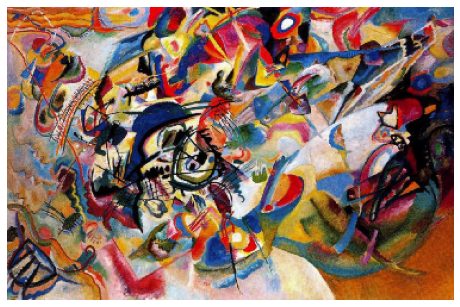

In [ ]:
content_image = load_image(url, image_size=(375,375))
show_n([content_image])

Here we use the Inception convolutional network from Google. !(It was a winner of the ILSVRC circa 2013!)

Read about it here if interested in knowing more: https://medium.com/coinmonks/paper-review-of-googlenet-inception-v1-winner-of-ilsvlc-2014-image-classification-c2b3565a64e7

In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 2s 0us/step


We select a couple of layers from the network to maximize. These layers correspond to a size/level of visual construct. The lower layers will see very local visual features (lines, little blobs), while the higher ones will see--for example, eyes, faces, noses, *etc*.

In [ ]:
# Maximize the activations of these layers
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

The Loss function guides our inverse optimization. Here, it's just looking to increase the activation in our selected layers. You can explore the activations of InceptionNet here: https://distill.pub/2019/activation-atlas/ See every layer and neuron group "like" a different concept like: Pineapple, Hot dog, Jeans and Sleeping bag...

In [ ]:
def calc_loss(img, model):
    # Pass forward the image through the model to retrieve the activations.
    layer_activations = model(img)

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return  tf.reduce_sum(losses)

Some code is obviously necessary to run the optimization... 

The next code cell is the core of our Deep Dream algorithm, but just a single iteration of it.
It will take the current image we want to change and apply a small change to it so that it amplifies the selected layers.

The change is done by using the **gradients** - running backwards through the network from our selected layers (via the `loss`) to the input image with small changes to the pixel values.

We then add these small changes to the input image. Notice the `img = img + gradients` operation.

In [ ]:
@tf.function
def deepdream(model, img, step_size):
    print("deepdream",type(img),img.shape)
    with tf.GradientTape() as tape:
        # This needs gradients relative to `img`
        # `GradientTape` only watches `tf.Variable`s by default
        tape.watch(img)
        loss = calc_loss(img, model)

    # Calculate the gradient of the loss with respect to the pixels of the input image.
    gradients = tape.gradient(loss, img)

    # Normalize the gradients.
    gradients /= tf.math.reduce_std(gradients) + 1e-8 
    
    # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
    # You can update the image by directly adding the gradients (because they're the same shape!)
    img = img + gradients*step_size
    img = tf.clip_by_value(img, -1, 1)

    return loss, img


In [ ]:
# This function converts the image from [-1, 1] floating point 32 bit 
# to [0,255] unsigned int 8-bit.
def deprocess(img):
    img = 127.5*(img + 1.0)
    return tf.cast(img, tf.uint8)

This next function is the Deep Dream algorithm in full. But in essense it just runs the iterative function we defined above a number of times (100 by default). It accumulates the small changes to the image and displays it.

In [ ]:
def run_deep_dream_simple(model, img, steps=100, step_size=0.01):
    # Convert from uint8 to the range expected by the model.
    clear_output(wait=True)
    show_n([deprocess(img)])

    # main execution loop, every iteration applies little changes to the image
    for step in range(steps):
        loss, img = deepdream(model, img, step_size)

        if step % 100 == 0:
            clear_output(wait=True)
            show_n([deprocess(img)])
            print ("Step {}, loss {}".format(step, loss))

    clear_output(wait=True)
    show_n([deprocess(img)])

    return img

In [ ]:
# InceptionV3 resuired images to be in a certain range: [-1, 1]
content_image_i3 = np.array(content_image) * 1.999 - 1.0

Let's run the Deep Dream function and see the results!

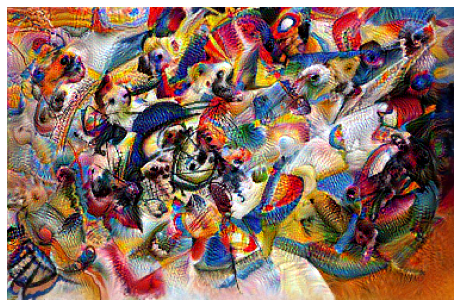

In [ ]:
dream_img = run_deep_dream_simple(model=dream_model, img=content_image_i3, steps=800, step_size=0.001)

Above, we only get these little changes applied at a single "scale." This means that the visual constructs (think "eyes") are of a single scale, for example 20x20 pixels. We would like to get "eyes" in any scale, even much bigger.

The following loop will change the scale of the image itself (also konwn as an octave) and apply the same algorithm as above.

The result is "smoother," and is capable of finding bigger things. For example I can definitely see a "bird" and a few "dogs".

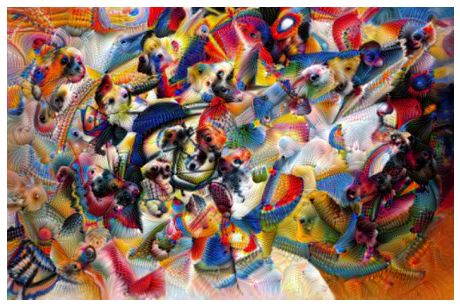

In [ ]:
OCTAVE_SCALE = 1.3

img = tf.constant(np.array(content_image_i3))
base_shape = tf.cast(tf.shape(img)[1:-1], tf.float32)
print(base_shape)

for n in range(3):
    new_shape = tf.cast(base_shape*(OCTAVE_SCALE**n), tf.int32)

    img = tf.image.resize(img, new_shape).numpy()

    img = run_deep_dream_simple(model=dream_model, img=img, steps=200, step_size=0.001)

To get an even more hi-res result we utilize "Tiling". We split the image to tiles and run the algorithm on each small tile at higher resolution.

The end result is much higer resolution and shows the "puppy slug" effect you must have seen before.

Again below are some extra code cells you'd need to run. Expand them out for details.

In [ ]:
def random_roll(img, maxroll):
    # Randomly shift the image to avoid tiled boundaries.
    shift = tf.random.uniform(shape=[2], minval=-maxroll, maxval=maxroll, dtype=tf.int32)
    shift_down, shift_right = shift[0],shift[1] 
    img_rolled = tf.roll(tf.roll(img, shift_right, axis=1), shift_down, axis=0)
    return shift_down, shift_right, img_rolled

We need to modify the original deep dream inducing function to work with our tiles. The core of the function is roughly similar, but here we accumulate the gradients over all of the tiles. Notice `gradients = gradients + tape.gradient(loss, img_rolled)`

In [ ]:
@tf.function
def get_tiled_gradients(model, img, tile_size=512):
    shift_down, shift_right, img_rolled = random_roll(img, tile_size)

    # Initialize the image gradients to zero.
    gradients = tf.zeros_like(img_rolled)

    for x in tf.range(0, img_rolled.shape[0], tile_size):
        for y in tf.range(0, img_rolled.shape[1], tile_size):
            # Calculate the gradients for this tile.
            with tf.GradientTape() as tape:
                # This needs gradients relative to `img_rolled`.
                # `GradientTape` only watches `tf.Variable`s by default.
                tape.watch(img_rolled)

                # Extract a tile out of the image.
                img_tile = img_rolled[x:x+tile_size, y:y+tile_size]
                loss = calc_loss(img_tile, model)

                # Update the image gradients for this tile.
                gradients = gradients + tape.gradient(loss, img_rolled)

    # Undo the random shift applied to the image and its gradients.
    gradients = tf.roll(tf.roll(gradients, -shift_right, axis=1), -shift_down, axis=0)

    # Normalize the gradients.
    gradients /= tf.math.reduce_std(gradients) + 1e-8 

    return gradients 

The overall algorithm is also changed a bit to accomodate for the tiles (e.g., using `get_tiled_gradients`).

In [ ]:
def run_deep_dream_with_octaves(model, img, steps_per_octave=100, step_size=0.01, 
                                num_octaves=3, octave_scale=1.3):
    for octave in range(num_octaves):
        # Scale the image based on the octave
        if octave>0:
            new_size = tf.cast(img.shape[1:3], tf.float32)*octave_scale
            img = tf.image.resize(img, tf.cast(new_size, tf.int32))

        for step in range(steps_per_octave):
            gradients = get_tiled_gradients(model, img)
            img = img + gradients*step_size
            img = tf.clip_by_value(img, -1, 1)

            if step % 10 == 0:
                clear_output(wait=True)
                show_n([deprocess(img)])
                print ("Octave {}, Step {}".format(octave, step))

    clear_output(wait=True)
    result = deprocess(img)
    show_n([result])

    return result

Let's run the tiled version and see what happens!

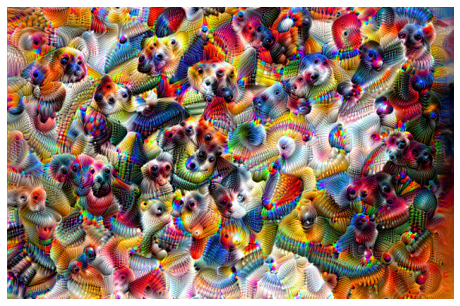

In [ ]:
dream_img = run_deep_dream_with_octaves(model=dream_model, img=content_image_i3, step_size=0.01)

## Neural Doodle ✏️

**Neural doodle** is effectively guided style transfer. First we mask the input style image with regions of different "semantic" value, (e.g., Grass, Sky, Rock, *etc.*). Then, given a new mask, we ask the model to complete in the details from the original image.

There's going to be some significant code to make this happen. Feel free to explore within, and please do remix to make your own doodles! (Note that this code may take some time to run!). 

In [ ]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

Like we did before, we select some specific layers (this time from [VGG19](https://arxiv.org/abs/1409.1556)) to guide the transfer. See for "Style" we pick layers from multiple heights, so we get small scale features as well as larger ones:

In [ ]:
content_layers = ['block5_conv2'] # content layer
style_layers = ['block%d_conv1' % i for i in [1,2,3,4]] # Style layer of interest

We're going to build a [Keras Model subclass](https://www.tensorflow.org/guide/keras/custom_layers_and_models) which will perform the neural style transfer for the "doodle". It takes masks of each "style area" of the image - the semantic regions mentioned above - and applies the [Gram matrix](https://towardsdatascience.com/neural-networks-intuitions-2-dot-product-gram-matrix-and-neural-style-transfer-5d39653e7916) calculation to the input image features. The Gram matrix allows us to "copy stylistic features" from one area of the input image to another image, by making sure they align (we try to bring the difference to 0).

This model subclass makes it more convenient to process an image, which we do further down.

In [ ]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers, input_shape):
        super(StyleContentModel, self).__init__()
        self.content_layers = content_layers
        self.style_layers = style_layers
        self.num_style_layers = len(self.style_layers)
        
        # Load our model. Load pretrained VGG, trained on imagenet data
        self.vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
        self.vgg.trainable = False

        # mask model as a series of pooling
        mask_input = tf.keras.layers.Input(shape=input_shape, name='mask_input')
        x = mask_input
        for layer in self.vgg.layers[1:]:
            name = 'mask_%s' % layer.name
            if 'conv' in layer.name:
                x = tf.keras.layers.AveragePooling2D((3, 3), padding='same', strides=(1, 1), name=name)(x)
            elif 'pool' in layer.name:
                x = tf.keras.layers.AveragePooling2D((2, 2), name=name)(x)
        self.mask_model = tf.keras.Model(mask_input, x)
        self.vgg_layers_mask = tf.keras.Model([self.mask_model.input], 
                                              [self.mask_model.get_layer('mask_%s' % name).output for name in self.style_layers])

        self.vgg_layers_style   = tf.keras.Model([self.vgg.input], 
                                                 [self.vgg.get_layer(name).output for name in self.style_layers])
        self.vgg_layers_content = tf.keras.Model([self.vgg.input], 
                                                 [self.vgg.get_layer(name).output for name in self.content_layers])
        

    def call(self, inputs, masks, show_masks=False):
        # Expects float input in [0,1], convert to [0, 255]
        inputs = inputs * 255.0
        style_outputs = []
        mask_features = [self.vgg_layers_mask(tf.cast(tf.reshape(m, [1,*m.shape,1]), tf.float32)) for m in masks]

        if show_masks:
            # if debugging - show the masks
            show_n([tf.squeeze(m,-1) for m in mask_features[0]], colorbar=True)
        
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs) 
        for m in mask_features:
            outputs_style = self.vgg_layers_style(preprocessed_input)
            # apply mask to image features
            outputs_style = [outputs_style[i] * m[i] for i in range(len(m))] 
            # calculate the Gram matrix
            outputs_style = [gram_matrix(outputs_style[i]) / tf.reduce_mean(m[i]) for i in range(len(m))]
            # prepare the output dictionary of style name -> style features
            style_dict = {style_name:value for style_name, value in zip(self.style_layers, outputs_style)}
            style_outputs += [style_dict]
            
        content_outputs = self.vgg_layers_content(preprocessed_input)
        if not isinstance(content_outputs, list):
            content_outputs = [content_outputs]
        content_dict = {content_name:value for content_name, value in zip(self.content_layers, content_outputs)}

        return {'content':content_dict, 'style':style_outputs}

To make sure we have 0-index numbering for our "style areas" with different colors. The [K-Means clustering algorithm](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) can help us here.

The `load_mask_labels` function is used for loading image files and creating the label indices with K-means.

In [ ]:
def kmeans(xs, k):
    assert xs.ndim == 2
    try:
        from sklearn.cluster import k_means
        _, labels, _ = k_means(xs.astype('float64'), k)
    except ImportError:
        from scipy.cluster.vq import kmeans2
        _, labels = kmeans2(xs, k, missing='raise')
    return labels

def load_mask_labels(style_mask_path, target_mask_path, num_labels, show_masks=False):
    '''Load both target and style masks.
    A mask image (nr x nc) with m labels/colors will be loaded as an array
    '''
    target_mask_img = load_image(target_mask_path)
    style_mask_img = load_image(style_mask_path)
    if show_masks:
        show_n([style_mask_img, target_mask_img], ['Input mask', 'Target mask'])
        
    mask_vecs = np.vstack([tf.reshape(style_mask_img, (-1, 3)), tf.reshape(target_mask_img, (-1, 3))])

    img_nrows, img_ncols = style_mask_img.shape[1:3]
    labels = kmeans(mask_vecs, num_labels)
    style_mask_label = labels[:img_nrows * img_ncols].reshape((img_nrows, img_ncols))
    target_mask_label = labels[img_nrows * img_ncols:].reshape((img_nrows, img_ncols))

    return ([style_mask_label == r for r in range(num_labels)], 
            [target_mask_label == r for r in range(num_labels)])


Now, we're ready to get started with neural doodling.

Consider this Max Liebermann painting.

98304/88902 [=================================] - 0s 0us/step


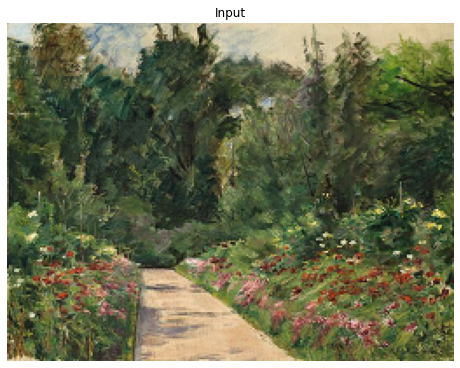

In [ ]:
content_image = load_image("https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Max_Liebermann_Der_Nutzgarten_in_Wannsee_nach_Westen_1922.jpg/512px-Max_Liebermann_Der_Nutzgarten_in_Wannsee_nach_Westen_1922.jpg")
show_n([content_image],['Input'])
#Once you run the Liebermann example, try adding your own image! 

We can create a masking of the painting with several regions. And then doodle another mask:

In [ ]:
style_masks, target_masks = load_mask_labels("https://github.com/mitmedialab/MAS.S60.Fall2020/raw/master/homework/source_mask.png", 
                                             "https://github.com/mitmedialab/MAS.S60.Fall2020/raw/master/homework/target_mask4.png", 
                                             num_labels=4, show_masks=True)

Use our `StyleContentModel` to calculate the stylistic features for the different regions of the image.

In [ ]:
model = StyleContentModel(style_layers, content_layers, [*target_masks[0].shape, 1])

80150528/80134624 [==============================] - 1s 0us/step


This shows us the way the visual features are going to be masked according the regions:

In [ ]:
sources = model(content_image, style_masks, show_masks=True)

In [ ]:
source_content, source_style = sources['content'], sources['style']

num_style_layers = float(len(style_layers))
num_content_layers = float(len(content_layers))

style_weight=1.
content_weight=0.1
tv_weight=100.

The Loss Function reveals that we are simply looking at the mean of squared distance (MSD) between our target and source image "stylitic features".

We simply want the stylistic features to match between areas of our input image (e.g. the Liebermann painting) and the neural doodle areas we drew. So we build a loss function that will go to 0 when the features match. Notice e.g. `mean(style_outputs - source_style)` - just taking the average of the difference.

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    
    loss = 0
    for i in range(len(style_outputs)):
        style_loss = tf.add_n([tf.reduce_mean((style_outputs[i][name]-source_style[i][name])**2) 
                               for name in style_outputs[i].keys()])
        loss += style_loss * style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-source_content[name])**2) 
                     for name in content_outputs.keys()])
    
    return loss + content_loss * content_weight / num_content_layers

In [ ]:
# convenience function to clip values to [0, 1]
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [ ]:
# The Adam optimizer will help us iteratively match the features between input and output
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

This is a single iteration of the "optimization". Using our loss function gradients, we slowly change our neural doodle to match the stylistic features of the input e.g. Liebermann painting.

In [ ]:
@tf.function()
def train_step(image, masks):
    with tf.GradientTape() as tape:
        outputs = model(image, masks)
        loss = style_content_loss(outputs) + tv_weight * tf.image.total_variation(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

Below we set the input to the algorithm. 

Experiment with starting with a totally random image vs. starting from the original image. (Uncomment one line or the other)

In [ ]:
# image = tf.Variable(tf.random.uniform([1, *target_masks[0].shape, 3]))
image = tf.Variable(tf.identity(content_image))

The execution loop simply applies the gradients imposed by the loss function:

In [ ]:
start = time.time()

epochs = 10
steps_per_epoch = 100

clear_output(wait=True)
show_n([image.read_value()],["Train step: {}".format(0)])

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image, target_masks)
        print(".", end='')
    clear_output(wait=True)
    show_n([image.read_value()],["Train step: {}".format(step)])

end = time.time()
print("Total time: {:.1f}".format(end-start))

The results can be quite artistic! Although it's no Liebermann.. 😀

You should try your own doodles! Just change the doodle input image.

**Challenge!** Once you've gone through the above steps, try to challenge yourself to complete the following prompts:
- Can you change the season (weather, vegatation) in the the painting? For example, change spring into winter, using one of the tools we've used.
- Can you find a way to increase the resolution of the images you've created today?